# Phase 1 Code Challenge Review 


TOPICS TO BE COVERED:
- Pandas Operations
- Data Visualization
- Statistics
- Python Data Structure

#### 1. Pandas Operations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# import data from the seaborn package
df = sns.load_dataset('iris')


## Show the first 5 rows of the df


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Examine the dimensions of the dataframe. How many rows and columns?


In [4]:
df.shape

(150, 5)

## Check to see if there are are missing values.


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## Create a new column, that is 10 times the sepal length, called sepal_length_10

In [6]:
df['sepal_length_10'] = df['sepal_length'] * 10

df[['sepal_length', 'sepal_length_10']]

,sepal_length,sepal_length_10
0,5.1,51.0
1,4.9,49.0
2,4.7,47.0
3,4.6,46.0
4,5.0,50.0
...,...,...
145,6.7,67.0
146,6.3,63.0
147,6.5,65.0
148,6.2,62.0


## List all of the different types of species in this DF  and get a count for each species. 

In [7]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# Create a Bar chart showing the average petal length for each species 


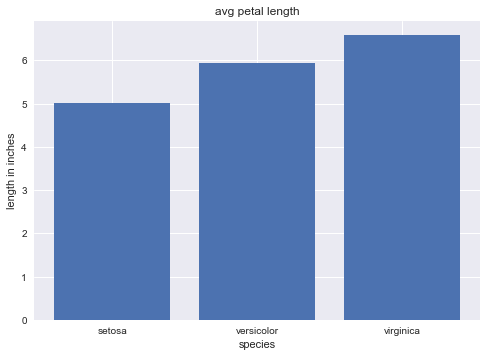

In [9]:
### your code here
petal_df = df[['species', 'sepal_length']].groupby('species').mean()

fig, ax = plt.subplots()

ax.set_title("avg petal length")
ax.set_xlabel("species")
ax.set_ylabel("length in inches")

ax.bar(x=petal_df.index, height=petal_df['sepal_length']);

## Create a Scatterplot of for sepal length and sepal width

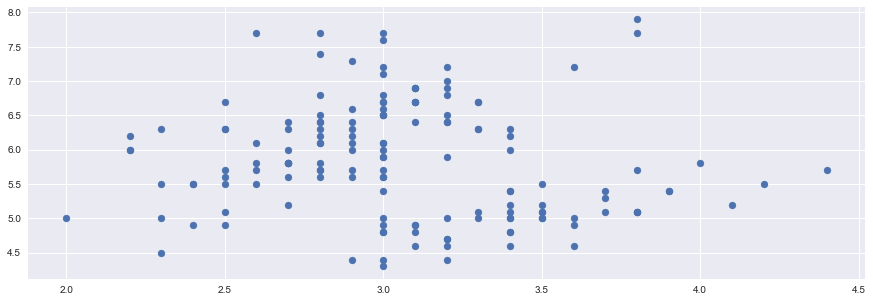

In [10]:
# scatterplot your code here 
fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(df['sepal_width'], df['sepal_length']);


In [11]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10
sepal_length,1.000000,-0.117570,0.871754,0.817941,1.000000
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.117570
petal_length,0.871754,-0.428440,1.000000,0.962865,0.871754
petal_width,0.817941,-0.366126,0.962865,1.000000,0.817941
sepal_length_10,1.000000,-0.117570,0.871754,0.817941,1.000000


## Using the correlation matrix above, describe the relationship between petal length and sepal width.


___
_**Answer:** With a correlation of ~ -0.43, the data suggests that there is no significant relationship between the petal length and sepal width._
___

## Identify the longest pedal length for each species of flower

In [12]:
max_pls = df[['species', 'petal_length']].groupby('species').max()
max_pls

,petal_length
species,
setosa,1.9
versicolor,5.1
virginica,6.9


In [13]:
df.sort_values(by = 'petal_length', ascending = False).head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
118,7.7,2.6,6.9,2.3,virginica,77.0


In [14]:
# use logical subset
df[df.petal_length == df.petal_length.max()]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
118,7.7,2.6,6.9,2.3,virginica,77.0


#### 4. Python Data Structure 

Can you parse this data structure to show where the money resides?

In [15]:
get_money = {'get':[{'get':[{'get':'money'}]}]}

In [16]:
# get to the money 
get_money['get'][0]['get'][0]['get']

'money'

In [17]:
groomer_info = {'pets':[
    {'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon Cat',
        'attribute': ['Alert','Independent','Playful']
    }],
    'Joe Rogan': [{
        'age': 8,
        'type': 'Parrot',
        'attribute': ['Loud','Opinionated','Annoying']
    }],
    'Rick Astley': [{
        'age': 2,
        'type': 'Labrador',
        'attributes': ['never','gives','you','up']
    }]}]
}    

In [18]:
## Create a list that holds all of the names of the pets. 

In [19]:
names = list(groomer_info['pets'][0].keys())

In [20]:
print(names)

['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']


## Create a list that contain all pets' types


In [21]:
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']
pet_types = [groomer_info['pets'][0][name][0]['type'] for name in names]
pet_types

['Pitbull', 'Maine Coon Cat', 'Parrot', 'Labrador']

## Create a function that takes a list of pets and a target age, and returns the names of pets who are older than that age.


In [22]:
def pets_older_than(groomer_info, age):
    pet_dict = groomer_info['pets'][0]
    return [name for name in pet_dict.keys() if pet_dict[name][0]['age'] > age]

In [23]:
pets_older_than(groomer_info,4)
# ['Ginger','Joe Rogan']

['Ginger', 'Joe Rogan']